In [221]:
import numpy as np
import pandas as pd

In [222]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, Ridge ,Lasso, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error

from tqdm.notebook import *

In [223]:
# dictionary with list object in values
details = {
    'show_id' : [None, 's2', 's3', 's4',None , 's6', 's7', 's8', 's9'],
    'type' : ['TV Show', None, 'Movie', 'TV Show', 'Movie','TV Show', 'Movie', 'Movie', 'TV Show'],
    'title' : ['rent', 'zero', 'marche', 'ecole', 'defense', None, 'zero', 'rent', 'vie'],
    'director' : ['Abdou', 'Grau', 'Chan', 'Acker','Luketic', 'Laron', 'Acker','Marcel', 'Labrador'],     
    'country' : ['Brazil', 'Mexico', None, 'US', 'Cam','UK','UK','UK','UK'], 
     'manque' : [139, np.nan, np.nan, np.nan, np.nan, np.nan,np.nan, np.nan, np.nan],
    'added' : [12.8, 17.8, 1007, 32, 1720.4, 4587, 1001.4,28.45, 37845.9],     
    'release_year' : [2020, 2016, 2011, 2009,2008, 2010, 2017, 2009, 2022],    
    'rating' : ['TV-MA', 'TV-MA', 'R', 'PG-13', 'PG-13', None,'PGI-17', 'TV-MO', 'S'],   
    'duration' : [90.5, 93, 78, 80,123, 75.33, 115, 86, 125],    
    'averageRating' : [5.7, np.nan, 10.5, 6.2, 6.2, np.nan, 10, 3.5, 9],
    'is_action' : [True, True, False, True, False, False,True, False, False],
    'duree' : [139, 90, np.nan, 155, 133, np.nan,165, 120, 159],
    'Nb_entree' : [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,165, np.nan, np.nan],
    'numVotes' : [1670, 208, np.nan, 123, np.nan, 817, 163, 33204, 1266]
}

In [224]:
# creating a Dataframe object 
df = pd.DataFrame(details)

In [225]:
df

,show_id,type,title,director,country,manque,added,release_year,rating,duration,averageRating,is_action,duree,Nb_entree,numVotes
0,None,TV Show,rent,Abdou,Brazil,139.0,12.80,2020,TV-MA,90.50,5.7,True,139.0,NaN,1670.0
1,s2,None,zero,Grau,Mexico,NaN,17.80,2016,TV-MA,93.00,NaN,True,90.0,NaN,208.0
2,s3,Movie,marche,Chan,None,NaN,1007.00,2011,R,78.00,10.5,False,NaN,NaN,NaN
3,s4,TV Show,ecole,Acker,US,NaN,32.00,2009,PG-13,80.00,6.2,True,155.0,NaN,123.0
4,None,Movie,defense,Luketic,Cam,NaN,1720.40,2008,PG-13,123.00,6.2,False,133.0,NaN,NaN
5,s6,TV Show,None,Laron,UK,NaN,4587.00,2010,None,75.33,NaN,False,NaN,NaN,817.0
6,s7,Movie,zero,Acker,UK,NaN,1001.40,2017,PGI-17,115.00,10.0,True,165.0,165.0,163.0
7,s8,Movie,rent,Marcel,UK,NaN,28.45,2009,TV-MO,86.00,3.5,False,120.0,NaN,33204.0
8,s9,TV Show,vie,Labrador,UK,NaN,37845.90,2022,S,125.00,9.0,False,159.0,NaN,1266.0


In [226]:
df_categorical_features = df.select_dtypes(include='object')
df_categorical_features.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'rating'], dtype='object')

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        7 non-null      object 
 1   type           8 non-null      object 
 2   title          8 non-null      object 
 3   director       9 non-null      object 
 4   country        8 non-null      object 
 5   manque         1 non-null      float64
 6   added          9 non-null      float64
 7   release_year   9 non-null      int64  
 8   rating         8 non-null      object 
 9   duration       9 non-null      float64
 10  averageRating  7 non-null      float64
 11  is_action      9 non-null      bool   
 12  duree          7 non-null      float64
 13  Nb_entree      1 non-null      float64
 14  numVotes       7 non-null      float64
dtypes: bool(1), float64(7), int64(1), object(6)
memory usage: 1.1+ KB


In [228]:
#df.set_index("transaction_id")

In [229]:
missing_values=df.isnull().sum()
missing_percent=(missing_values/len(df))*100
missing_table=pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

               Missing Values  Percentage
show_id                     2   22.222222
type                        1   11.111111
title                       1   11.111111
director                    0    0.000000
country                     1   11.111111
manque                      8   88.888889
added                       0    0.000000
release_year                0    0.000000
rating                      1   11.111111
duration                    0    0.000000
averageRating               2   22.222222
is_action                   0    0.000000
duree                       2   22.222222
Nb_entree                   8   88.888889
numVotes                    2   22.222222


In [230]:
df=df.drop(['manque', 'Nb_entree'], axis=1)

In [231]:
df

,show_id,type,title,director,country,added,release_year,rating,duration,averageRating,is_action,duree,numVotes
0,None,TV Show,rent,Abdou,Brazil,12.80,2020,TV-MA,90.50,5.7,True,139.0,1670.0
1,s2,None,zero,Grau,Mexico,17.80,2016,TV-MA,93.00,NaN,True,90.0,208.0
2,s3,Movie,marche,Chan,None,1007.00,2011,R,78.00,10.5,False,NaN,NaN
3,s4,TV Show,ecole,Acker,US,32.00,2009,PG-13,80.00,6.2,True,155.0,123.0
4,None,Movie,defense,Luketic,Cam,1720.40,2008,PG-13,123.00,6.2,False,133.0,NaN
5,s6,TV Show,None,Laron,UK,4587.00,2010,None,75.33,NaN,False,NaN,817.0
6,s7,Movie,zero,Acker,UK,1001.40,2017,PGI-17,115.00,10.0,True,165.0,163.0
7,s8,Movie,rent,Marcel,UK,28.45,2009,TV-MO,86.00,3.5,False,120.0,33204.0
8,s9,TV Show,vie,Labrador,UK,37845.90,2022,S,125.00,9.0,False,159.0,1266.0


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        7 non-null      object 
 1   type           8 non-null      object 
 2   title          8 non-null      object 
 3   director       9 non-null      object 
 4   country        8 non-null      object 
 5   added          9 non-null      float64
 6   release_year   9 non-null      int64  
 7   rating         8 non-null      object 
 8   duration       9 non-null      float64
 9   averageRating  7 non-null      float64
 10  is_action      9 non-null      bool   
 11  duree          7 non-null      float64
 12  numVotes       7 non-null      float64
dtypes: bool(1), float64(5), int64(1), object(6)
memory usage: 1005.0+ bytes


In [233]:
##Cette Cellule n´est pas du cours
#pd.set_option('display.max_columns', None)

In [234]:
#feature=['averageRating', 'duree','numVotes']

In [235]:
def ramp_par_val_moy(feature):
    df[feature].fillna(df[feature].mean(), inplace=True)   
for feature in ["averageRating", "duree","numVotes"]:
    ramp_par_val_moy(feature)

In [236]:
df

,show_id,type,title,director,country,added,release_year,rating,duration,averageRating,is_action,duree,numVotes
0,None,TV Show,rent,Abdou,Brazil,12.80,2020,TV-MA,90.50,5.7,True,139.000000,1670.000000
1,s2,None,zero,Grau,Mexico,17.80,2016,TV-MA,93.00,7.3,True,90.000000,208.000000
2,s3,Movie,marche,Chan,None,1007.00,2011,R,78.00,10.5,False,137.285714,5350.142857
3,s4,TV Show,ecole,Acker,US,32.00,2009,PG-13,80.00,6.2,True,155.000000,123.000000
4,None,Movie,defense,Luketic,Cam,1720.40,2008,PG-13,123.00,6.2,False,133.000000,5350.142857
5,s6,TV Show,None,Laron,UK,4587.00,2010,None,75.33,7.3,False,137.285714,817.000000
6,s7,Movie,zero,Acker,UK,1001.40,2017,PGI-17,115.00,10.0,True,165.000000,163.000000
7,s8,Movie,rent,Marcel,UK,28.45,2009,TV-MO,86.00,3.5,False,120.000000,33204.000000
8,s9,TV Show,vie,Labrador,UK,37845.90,2022,S,125.00,9.0,False,159.000000,1266.000000


In [237]:
df.isnull().sum(axis = 0)

show_id          2
type             1
title            1
director         0
country          1
added            0
release_year     0
rating           1
duration         0
averageRating    0
is_action        0
duree            0
numVotes         0
dtype: int64

In [238]:
def handle_categorical_features(feature):
    df[feature].fillna(df[feature].value_counts().index[0], inplace = True)
    
for feature in ['show_id', 'type', 'title', 'country'
                              ,'rating']:
    handle_categorical_features(feature)

#df.isnull().sum(axis = 0)

In [239]:
df.isnull().sum(axis = 0)

show_id          0
type             0
title            0
director         0
country          0
added            0
release_year     0
rating           0
duration         0
averageRating    0
is_action        0
duree            0
numVotes         0
dtype: int64

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        9 non-null      object 
 1   type           9 non-null      object 
 2   title          9 non-null      object 
 3   director       9 non-null      object 
 4   country        9 non-null      object 
 5   added          9 non-null      float64
 6   release_year   9 non-null      int64  
 7   rating         9 non-null      object 
 8   duration       9 non-null      float64
 9   averageRating  9 non-null      float64
 10  is_action      9 non-null      bool   
 11  duree          9 non-null      float64
 12  numVotes       9 non-null      float64
dtypes: bool(1), float64(5), int64(1), object(6)
memory usage: 1005.0+ bytes


In [241]:
#4- Filtrer les variables categorielles
df_variables_categorielles = df.select_dtypes(include='object')
df_variables_categorielles.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'rating'], dtype='object')

In [242]:
#def handle_categorical_features(feature, df):
    #df[feature].fillna(df[feature].value_counts().index[0], inplace = True)
#for feature in df.columns:
    #handle_categorical_features(feature, df)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        9 non-null      object 
 1   type           9 non-null      object 
 2   title          9 non-null      object 
 3   director       9 non-null      object 
 4   country        9 non-null      object 
 5   added          9 non-null      float64
 6   release_year   9 non-null      int64  
 7   rating         9 non-null      object 
 8   duration       9 non-null      float64
 9   averageRating  9 non-null      float64
 10  is_action      9 non-null      bool   
 11  duree          9 non-null      float64
 12  numVotes       9 non-null      float64
dtypes: bool(1), float64(5), int64(1), object(6)
memory usage: 1005.0+ bytes


In [244]:
df.isnull().sum(axis = 0)

show_id          0
type             0
title            0
director         0
country          0
added            0
release_year     0
rating           0
duration         0
averageRating    0
is_action        0
duree            0
numVotes         0
dtype: int64

In [245]:
df

,show_id,type,title,director,country,added,release_year,rating,duration,averageRating,is_action,duree,numVotes
0,s2,TV Show,rent,Abdou,Brazil,12.80,2020,TV-MA,90.50,5.7,True,139.000000,1670.000000
1,s2,TV Show,zero,Grau,Mexico,17.80,2016,TV-MA,93.00,7.3,True,90.000000,208.000000
2,s3,Movie,marche,Chan,UK,1007.00,2011,R,78.00,10.5,False,137.285714,5350.142857
3,s4,TV Show,ecole,Acker,US,32.00,2009,PG-13,80.00,6.2,True,155.000000,123.000000
4,s2,Movie,defense,Luketic,Cam,1720.40,2008,PG-13,123.00,6.2,False,133.000000,5350.142857
5,s6,TV Show,rent,Laron,UK,4587.00,2010,TV-MA,75.33,7.3,False,137.285714,817.000000
6,s7,Movie,zero,Acker,UK,1001.40,2017,PGI-17,115.00,10.0,True,165.000000,163.000000
7,s8,Movie,rent,Marcel,UK,28.45,2009,TV-MO,86.00,3.5,False,120.000000,33204.000000
8,s9,TV Show,vie,Labrador,UK,37845.90,2022,S,125.00,9.0,False,159.000000,1266.000000


In [246]:

#4- Transformer chaque variable catégorielle en variables binaires.
df = pd.get_dummies(df, columns = df_variables_categorielles.columns, dtype=int)
df

,added,release_year,duration,averageRating,is_action,duree,numVotes,show_id_s2,show_id_s3,show_id_s4,...,country_Cam,country_Mexico,country_UK,country_US,rating_PG-13,rating_PGI-17,rating_R,rating_S,rating_TV-MA,rating_TV-MO
0,12.80,2020,90.50,5.7,True,139.000000,1670.000000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,17.80,2016,93.00,7.3,True,90.000000,208.000000,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1007.00,2011,78.00,10.5,False,137.285714,5350.142857,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,32.00,2009,80.00,6.2,True,155.000000,123.000000,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,1720.40,2008,123.00,6.2,False,133.000000,5350.142857,1,0,0,...,1,0,0,0,1,0,0,0,0,0
5,4587.00,2010,75.33,7.3,False,137.285714,817.000000,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,1001.40,2017,115.00,10.0,True,165.000000,163.000000,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7,28.45,2009,86.00,3.5,False,120.000000,33204.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,37845.90,2022,125.00,9.0,False,159.000000,1266.000000,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   added              9 non-null      float64
 1   release_year       9 non-null      int64  
 2   duration           9 non-null      float64
 3   averageRating      9 non-null      float64
 4   is_action          9 non-null      bool   
 5   duree              9 non-null      float64
 6   numVotes           9 non-null      float64
 7   show_id_s2         9 non-null      int32  
 8   show_id_s3         9 non-null      int32  
 9   show_id_s4         9 non-null      int32  
 10  show_id_s6         9 non-null      int32  
 11  show_id_s7         9 non-null      int32  
 12  show_id_s8         9 non-null      int32  
 13  show_id_s9         9 non-null      int32  
 14  type_Movie         9 non-null      int32  
 15  type_TV Show       9 non-null      int32  
 16  title_defense      9 non-null 

In [1160]:
# Séparation des données et des cibles 
x = df.drop('averageRating', axis=1)
y = df.averageRating

In [1034]:
##h)....separer les données

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [1035]:
x_test

,added,release_year,duration,is_action,duree,numVotes,show_id_,show_id_s2,show_id_s3,show_id_s4,...,rating_S,rating_TV-MA,rating_TV-MO,country_Brazil,country_Mexico,country_UK,country_US,type_Movie,type_NAN,type_TV Show
7,28.45,2009,86.00,False,120.000000,33204.0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,17.80,2016,93.00,True,90.000000,208.0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
5,4587.00,2010,75.33,False,137.285714,817.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [1036]:
 y_test

7    3.5
1    7.3
5    7.3
Name: averageRating, dtype: float64

In [1037]:
#Proceder à une Standardisation (normalisation standard) des données
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [1038]:
# creer un modele de regression lineaire 
modele_rl = LinearRegression()
#et fitter le modele
modele_rl.fit(x_train_scaled, y_train)
#afficher les performances du modele
print("score train :", modele_rl.score(x_train_scaled, y_train))
print("score test :", modele_rl.score(x_test_scaled, y_test))

score train : 1.0
score test : -0.5601007456809031


In [1039]:
##k) 
#Les coefficients de détermination et les racines des erreurs quadratiques moyennes sont deux métriques 
#permettant d'évaluer les performances du modèle sur l'échantillon d'apprentissage et celui de test.
#ou bien encore mieux
pred_train = modele_rl.predict(x_train_scaled)
pred_test = modele_rl.predict(x_test_scaled)

print("rmse train :", np.sqrt(mean_squared_error(y_train, pred_train)))
print('rmse test :', np.sqrt(mean_squared_error(y_test, pred_test)))

rmse train : 1.3567149463006938e-15
rmse test : 2.2374516639165005


In [1040]:
#l) Remplir..........
df_resultat_ridge =[]
alphas =[0.01, 0.05, 0.1, 0.3, 0.8, 1, 5, 10, 15, 20, 35, 50]
#for alpha in tqdm_notebook(alphas):
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_train_scaled, y_train)   
    y_pred = ridge.predict(x_test_scaled)   
    mse_result = mean_squared_error(y_test, y_pred)  
    res = pd.DataFrame({"Variable": x_train.columns, "Coefficient": ridge.coef_})
    res["alpha"] = alpha
    res["mse"] = mse_result
    
    df_resultat_ridge.append(res)

df_resultat_ridge = pd.concat(df_resultat_ridge)

alphas_result=df_resultat_ridge.groupby("alpha")["mse"].mean()

In [1041]:
df_resultat_ridge

,Variable,Coefficient,alpha,mse
0,added,0.056712,0.01,7.588988
1,release_year,0.045516,0.01,7.588988
2,duration,0.002712,0.01,7.588988
3,is_action,-0.077255,0.01,7.588988
4,duree,0.116622,0.01,7.588988
...,...,...,...,...
37,country_UK,0.125793,50.00,7.218990
38,country_US,-0.080396,50.00,7.218990
39,type_Movie,0.065298,50.00,7.218990
40,type_NAN,0.000000,50.00,7.218990


In [1042]:
alphas_result

alpha
0.01     7.588988
0.05     7.588554
0.10     7.588010
0.30     7.585835
0.80     7.580380
1.00     7.578194
5.00     7.534639
10.00    7.482846
15.00    7.435643
20.00    7.393323
35.00    7.291922
50.00    7.218990
Name: mse, dtype: float64

In [1043]:
mean_df = pd.DataFrame(alphas_result)

In [1044]:
mean_df

,mse
alpha,
0.01,7.588988
0.05,7.588554
0.10,7.588010
0.30,7.585835
0.80,7.580380
1.00,7.578194
5.00,7.534639
10.00,7.482846
15.00,7.435643


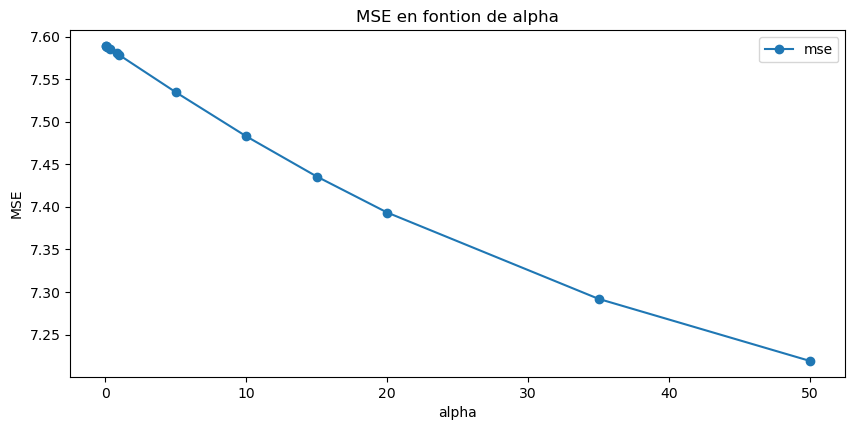

In [1045]:
mean_df.plot(figsize = (10, 4.5), xlabel ="alpha",  ylabel ="MSE", style = 'o-', title="MSE en fontion de alpha");

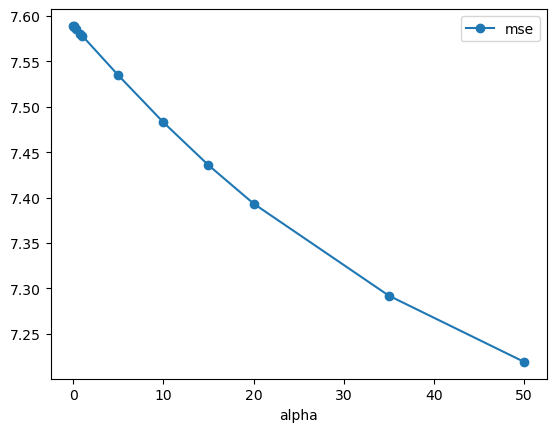

In [1046]:
mean_df.plot(style = 'o-');

In [1047]:
##n).....
modele_rr = Ridge(alpha=10)
modele_rr.fit(x_train_scaled, y_train)
#afficher les performances du modele
print("score train :", modele_rr.score(x_train_scaled, y_train))
print("score test :", modele_rr.score(x_test_scaled, y_test))

score train : 0.9595757408915596
score test : -1.3319117631823372


In [1048]:
##o).....
pred_train = modele_rr.predict(x_train_scaled)
pred_test = modele_rr.predict(x_test_scaled)
print("rmse train :", np.sqrt(mean_squared_error(y_train, pred_train)))
print('rmse test :', np.sqrt(mean_squared_error(y_test, pred_test)))


rmse train : 0.3935921036710906
rmse test : 2.7354790707927368


In [1049]:
##p) Appliquer GridSerachCV pour le modele permettant une pénalité de norme L1 L2 
parameters = {'alpha':[0.01, 0.02, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0], 'l1_ratio': np.arange(0.0, 1.01, 0.05)}
model = ElasticNet()

ElasticNet_Regr = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=3)
ElasticNet_Regr.fit(x_train_scaled, y_train)

C:\Users\thfam\anaconda3\envs\Projet_accidents_routiers\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.721e-03, tolerance: 1.653e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\thfam\anaconda3\envs\Projet_accidents_routiers\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.038e-03, tolerance: 1.323e-03 Linear regression models with null weight for the l1 regularization term are more efficientl

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.02, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0,
                                   10.0],
                         'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
             scoring='neg_mean_squared_error')

In [1050]:
# best estimator
print(ElasticNet_Regr.best_estimator_)

ElasticNet(alpha=0.02, l1_ratio=0.8500000000000001)


In [1051]:
# best model
best_model = ElasticNet_Regr.best_estimator_
best_model.fit(x_train_scaled, y_train)

ElasticNet(alpha=0.02, l1_ratio=0.8500000000000001)

In [1052]:
##q)......



In [1053]:
##r) Creer un modele avec les meilleurs parametres
best_ElasticNet_Regr = ElasticNet(alpha = 0.02, l1_ratio = 0.8500000000000001)
#Fitter le modele
best_ElasticNet_Regr.fit(x_train_scaled, y_train)
#afficher les performances du modele
print("score train :", best_ElasticNet_Regr.score(x_train_scaled, y_train))
print("score test :", best_ElasticNet_Regr.score(x_test_scaled, y_test))

score train : 0.9997646294142134
score test : -2.5205526573809354


In [1054]:
##s) Calculer la racine de l´erreur quadratique moyenne.....
pred_train = best_ElasticNet_Regr.predict(x_train_scaled)
pred_test = best_ElasticNet_Regr.predict(x_test_scaled)

print("mse train:", mean_squared_error(y_train, pred_train))
print("mse test:", mean_squared_error(y_test, pred_test))

mse train: 0.0009019923893088368
mse test: 11.29706230501793


In [1055]:
#Interpreter

#Il sera donc question d’ajuster le modèle pour chaque combinaison possible
#des valeurs des hyper-paramètres, puis retenir celle qui va correspondre à la
#valeur la plus faible du MSE (c’est l’approche par cross-validation

In [ ]:
########################################################################Reserve



# training model with 0.5 alpha value 
model = Ridge(alpha = 0.5, normalize = False, tol = 0.001, \ 
              solver ='auto', random_state = 42) 
model.fit(X_train, y_train) 
  
# predicting the y_test 
y_pred = model.predict(X_test) 
  
# finding score for our model 
score = model.score(X_test, y_test) 
print("\n\nModel score : ", score) 

In [ ]:
##############################################################################Reserve

#--------------------------------------------------------------------------------------
# modele sur une variable
score train : 0.854718187924107
score test : 0.8499781674735593

rmse train : 174.17094543410923
rmse test :  196.3849289077361

#Nous possédons une vingtaine de variables différentes, ainsi il est dommage de se contenter de l'information contenue dans une seule d'entre elles pour construire notre modèle prédictif.
#Il convient donc de tester un modèle de régression multiple afin d'utiliser le maximum d'informations disponibles dans notre base de données.
#Un modèle de régression Elastic Net, permet d'éviter le sur-ap

#--------------------------------------------------------------------------------------
# model sur plusieurs variables
score train : 0.9297394714424766
score test : 0.9258745732614514

rmse train : 121.12276922583008
rmse test : 138.0430435864277

#La faible différence de score entre l'échantillon d'entraînement et l'échantillon de test signifie que le modèle n'est pas (ou peu) altéré par un effet de sur-apprentissage.

#Comme prévu, en comparant avec les résultats du modèle simple, le modèle créé avec plus de variables s'ajuste mieux aux données et produit des prévisions plus précises.
#Les points prédits par le modèle sont finalement comparés aux points observés pour mesure

#--------------------------------------------------------------------------------------
What does the Mean Squared Error Tell You?
The smaller the mean squared error, the closer you are to finding the line of best fit. Depending on your data, it may be impossible 
to get a very small value for the mean squared error. For example, the above data is scattered wildly around the regression line, 
so 6.08 is as good as it gets (and is in fact, the line of best fit). Note that I used an online calculator to get the regression 
line; where the MSE really comes in handy is if you were finding an equation for the regression line by hand: you could try several 
equations, and the one that gave you the smallest MSE would be the line of best fit.

)
#--------------------------------------------------------------------------------------
Il sera donc question d’ajuster le modèle pour chaque combinaison possible
des valeurs des hyper-paramètres, puis retenir celle qui va correspondre à la
valeur la plus faible du MSE (c’est l’approche par cross-validatio

In [ ]:
#-----------------------------------------------------------------EXAMEN----------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------

In [7]:
###a) executer......

In [8]:
###b)Lire le fichier house_price.csv dans un Dataframe appelé hp. Attention à la colonne des index
hp = pd.read_csv("house_price.csv",index_col = "Id")
hp.head()

In [ ]:
#afficher toutes les colonnes
pd.pandas.set_option('display.max_columns', None)
print(hp.head())

In [9]:
###c)Afficher les informations de hp.
hp.info()

In [ ]:
###d)Afficher les valeurs manquantes du dataframe. Supprimer les variables contenant plus de 80% de données manquantes.

#Afficher les valeurs manquantes du dataframe
hp.isnull().sum(axis = 0)

In [ ]:
#trouver le pourcentage de valeurs manquantes dans les variables
missing_values  =hp.isnull().sum()
missing_percent = (missing_values/len(hp))*100
missing_table = pd.DataFrame({'valeurs manquantes': missing_values, 'pourcentage': missing_percent})
#pour tester
print(missing_table)

In [ ]:
#Transformer le tableau de variables manquantes en dataframe 
missing_table = pd.DataFrame(missing_table)
#et afficher les variables avec plus 80% de valeurs manquantes
display(missing_table.loc[missing_table['pourcentage'] > 80.0])

In [ ]:
#suprimer les variables avec plus de 80% de valeurs manquantes
hp = hp.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
#pour tester
hp.info()

In [ ]:
###e)Remplacer, pour chaque variable numérique, les valeurs manquantes par la moyenne de la variable.
def ramp_par_val_moy(feature):
    hp[feature].fillna(hp[feature].mean(), inplace=True)      
for feature in ["LotFrontage", "MasVnrArea", "GarageYrBlt"]:
    ramp_par_val_moy(feature)

In [48]:
###f).Transformer chaque variable catégorielle en variables binaires.

#Filtrer les variables categorielles
#hp_variables_categorielles = hp.select_dtypes(include='object')
#hp_variables_categorielles.columns

##########Reperer des autres caracteres parmi les valeurs uniques
#non_nan=[]
#for feature in ["type", "title", "numVotes"]: # UTILISER LE RESULTAT de hp_variables_categorielles.columns
    #non_nan.extend(hp[feature])
#non_nan = pd.DataFrame(non_nan)
#print(non_nan[0].unique())


#######Pour controler
#display(hp.head())

#######Rempler les autres carracteres par des NANs
#hp.replace([ '?', '???','!'], 'NAN')

#############Pour controler
#non_nan=[]
#for feature in ["type", "title", "numVotes"]: # UTILISER LE RESULTAT de hp_variables_categorielles.columns
    #non_nan.extend(hp[feature])
#non_nan = pd.DataFrame(non_nan)
#print(non_nan[0].unique()) 

In [ ]:
###f).Transformer chaque variable catégorielle en variables binaires.
#1- Remplacer les valeurs manquantes dans les variables categorielles par leur mode
def handle_categorical_features(feature):
    hp[feature].fillna(hp[feature].value_counts().index[0], inplace = True)
    
for feature in ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure'
                              , 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu'
                              , 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    handle_categorical_features(feature)

In [ ]:
#2- Pour verification
hp.isnull().sum(axis = 0)

In [ ]:
#3- Pour verification
hp.info()

In [ ]:
#4- Filtrer les variables categorielles
hp_variables_categorielles = hp.select_dtypes(include='object')
hp_variables_categorielles.columns

In [ ]:
#5- Transformer chaque variable catégorielle en variables binaires.
hp = pd.get_dummies(hp, columns = hp_variables_categorielles.columns, dtype=int)
hp

In [ ]:
#Pour verification
hp.info()

In [ ]:
###g).creer un objet y et x..........

x = hp.drop('SalePrice', axis=1)
y = hp.salePrice

##ou bien
x = hp.iloc[:, 1:14]
y = hp.iloc[:, 0]

In [ ]:
###h)....separer les données

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [ ]:
##i) #Proceder à une Standardisation (normalisation standard) des données

scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
##j) 
# creer un modele de regression lineaire 
modele_rl = LinearRegression()
#et fitter le modele
modele_rl.fit(x_train_scaled, y_train)
#afficher les performances du modele
print("score train :", modele_rl.score(x_train_scaled, y_train))
print("score test :", modele_rl.score(x_test_scaled, y_test))

In [ ]:
##k) 
#Les coefficients de détermination et les racines des erreurs quadratiques moyennes sont deux métriques 
#permettant d'évaluer les performances du modèle sur l'échantillon d'apprentissage et celui de test.
#ou bien encore mieux
pred_train = modele_rl.predict(x_train_scaled)
pred_test = modele_rl.predict(x_test_scaled)

print("rmse train :", np.sqrt(mean_squared_error(y_train, pred_train)))
print('rmse test :', np.sqrt(mean_squared_error(y_test, pred_test)))

In [ ]:
#interpreter

In [ ]:
#De plus, l'écart se resserre entre les erreurs / scores : le modèle fait moins d'overfitting.

In [ ]:
##l) Remplir..........
df_resultat_ridge =[]
alphas =[0.01, 0.05, 0.1, 0.3, 0.8, 1, 5, 10, 15, 20, 35, 50]
for alpha in tqdm_notebook(alphas):
#for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_train_scaled, y_train)   
    y_pred = ridge.predict(x_test_scaled)   
    mse_result = mean_squared_error(y_test, y_pred)  
    res = pd.DataFrame({"Variable": x_train.columns, "Coefficient": ridge.coef_})
    res["alpha"] = alpha
    res["mse"] = mse_result
    
    df_resultat_ridge.append(res)

df_resultat_ridge = pd.concat(df_resultat_ridge)

alphas_result=df_resultat_ridge.groupby("alpha")["mse"].mean()

In [ ]:
##m) Afficher dans un graphique
# convertir en Pandas dataframe 
alphas_result_df = pd.DataFrame(alphas_result)


In [ ]:
# Et afficher
alphas_result_df.plot(figsize = (10, 4.5), xlabel ="alpha",  ylabel ="MSE", style = 'o-', title="MSE en fontion de alpha");

In [ ]:
#print(la meilleur valeur de alpha est celle qui produit la plus petite valeur de MSE donc: .....)

In [ ]:
##n).....
modele_rr = Ridge(alpha= 'valeur qui donne la plus petite valeur du MSE')
modele_rr.fit(x_train_scaled, y_train)
#afficher les performances du modele
print("score train :", modele_rr.score(x_train_scaled, y_train))
print("score test :", modele_rr.score(x_test_scaled, y_test))

In [ ]:
##o).....
pred_train = modele_rr.predict(x_train_scaled)
pred_test = modele_rr.predict(x_test_scaled)
print("rmse train :", np.sqrt(mean_squared_error(y_train, pred_train)))
print('rmse test :', np.sqrt(mean_squared_error(y_test, pred_test)))

In [ ]:
#interpreter les résultats


#De plus, l'écart se resserre entre les erreurs / scores : le modèle fait moins d'overfitting.



#La faible différence de score entre l'échantillon d'entraînement et l'échantillon de test signifie que le modèle n'est pas (ou peu) altéré par un effet de sur-apprentissage.

#Comme prévu, en comparant avec les résultats du modèle simple, le modèle créé avec plus de variables s'ajuste mieux aux données et produit des prévisions plus précises.
#Les points prédits par le modèle sont finalement comparés aux points observés pour mesure



In [ ]:
##p) Appliquer GridSerachCV pour le modele permettant une pénalité de norme L1 L2 
parameters = {'alpha':[0.01, 0.02, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0], 'l1_ratio': np.arange(0.0, 1.01, 0.05)}
model = ElasticNet()

ElasticNet_Regr = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=3)
ElasticNet_Regr.fit(x_train_scaled, y_train)

In [ ]:
#Afficher les meilleurs parametres
print(ElasticNet_Regr.best_estimator_)

In [712]:
##q)......



In [ ]:
##r) Creer un modele avec les meilleurs parametres
best_ElasticNet_Regr = ElasticNet(alpha = best_alpha, l1_ratio = best_l1_ratio)
#Fitter le modele
best_ElasticNet_Regr.fit(x_train_scaled, y_train)
#afficher les performances du modele
print("score train :", best_ElasticNet_Regr.score(x_train_scaled, y_train))
print("score test :", best_ElasticNet_Regr.score(x_test_scaled, y_test))

In [ ]:
##s) Calculer la racine de l´erreur quadratique moyenne.....
pred_train = best_ElasticNet_Regr.predict(x_train_scaled)
pred_test = best_ElasticNet_Regr.predict(x_test_scaled)
print("rmse train:", np.sqrt(mean_squared_error(y_train, pred_train)))
print("rmse test:", np.sqrt(mean_squared_error(y_test, pred_test)))

In [ ]:
#interpreter


#De plus, l'écart se resserre entre les erreurs / scores : le modèle fait moins d'overfitting.



#La faible différence de score entre l'échantillon d'entraînement et l'échantillon de test signifie que le modèle n'est pas (ou peu) altéré par un effet de sur-apprentissage.

#Comme prévu, en comparant avec les résultats du modèle simple, le modèle créé avec plus de variables s'ajuste mieux aux données et produit des prévisions plus précises.
#Les points prédits par le modèle sont finalement comparés aux points observés pour mesure

In [109]:
data = pd.read_csv( 
    "https://raw.githubusercontent.com/lucifertrj/"
    "100DaysOfML/main/Day14%3A%20Logistic_Regression"
    "_Metric_and_practice/heart_disease.csv") 
data.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
